## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*I would like to take a descriptive-statistical analysis approach for this particular project. 
According to the information provided in the above overview, I believe it is the best technique for business knowledge. According to the information provided, the quality of the red wine is determined by elements that are both partial and impartial. Making a wine taster test and evaluate the wine based on their taste may vary from time to time because his/her evaluation is based on taste sensors. However, if the wine is tested using prior data from high-quality wines, such as acidity, pH level, sugar, and chemical properties, there is a considerable possibility that the results will be unbiased. As a result, testing the quality of red wine is reliable and effective.*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*Unbiased data would be needed in order to make a right prediction, the word unbiased was used because if relied on data that doesn't remain constant such as the data recieved based on the tasting of wine by professional wine, the data might vary because they might be very consistent overtime .Apart from data that keeps changing, statistical data such as level of acidity, sulphates, density etc would be very helpful in giving accurate results. *

### Data Collection

**Q3. From where do we get our data?**

*Data is usually collected from various sources, such as open source websites, web scraping, application programming interface, Research Institutes and more. This particular data has been sourced from : Paulo Cortez, University of Minho, Guimarães, Portugal, A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*From the north of Portugal*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*This could possibly help their product's quality improve significantly which would lead to having *

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,r2_score

In [237]:
with open('/Users/andreapercy/Desktop/winequality-red.csv', 'r') as file:
    data = file.read()
data = data.replace(';', ',')
with open('/Users/andreapercy/Desktop/winequality-red.csv', 'w') as file:
    file.write(data)
print("Conversion to CSV completed.")

Conversion to CSV completed.


In [238]:
df=pd.read_csv('/Users/andreapercy/Desktop/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [239]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* There are no null values as of the table displayed below

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [241]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [242]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [243]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Checking Outliers

In [244]:
def outy(dataframe,ft):
    dataframe.boxplot(ft,figsize=(20,10))
    plt.show()

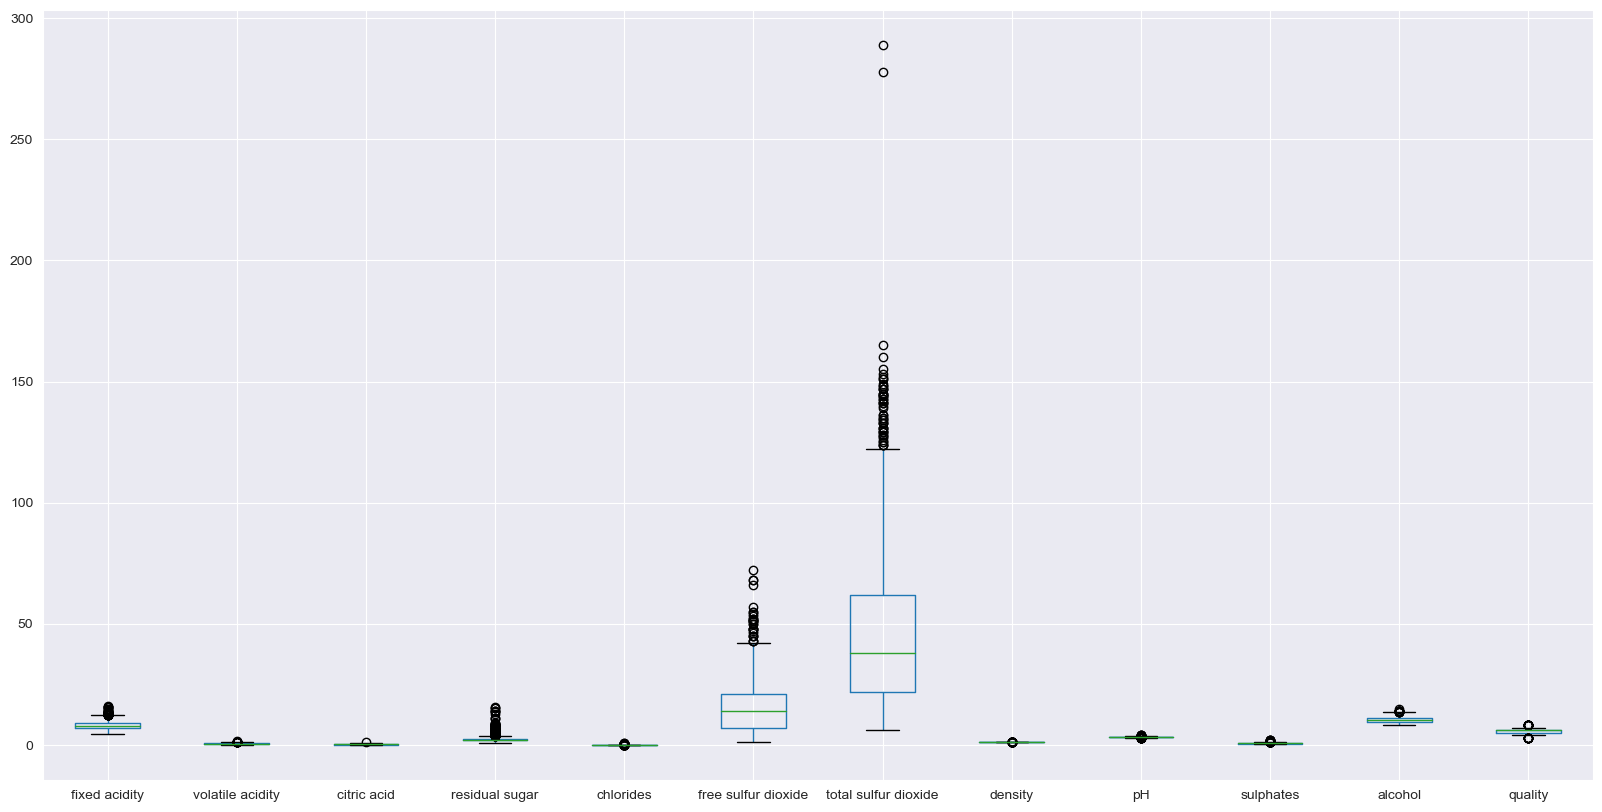

In [245]:
feat=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']
outy(df,feat)

<li> From the above box plots it is very clear that all the columns have outliers </li>

**Removing outliers**


In [246]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [247]:
print("Old data set shape with Outliers ",df.shape)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New data set shape without Outliers ",df_out.shape)

Old data set shape with Outliers  (1599, 12)
New data set shape without Outliers  (1179, 12)


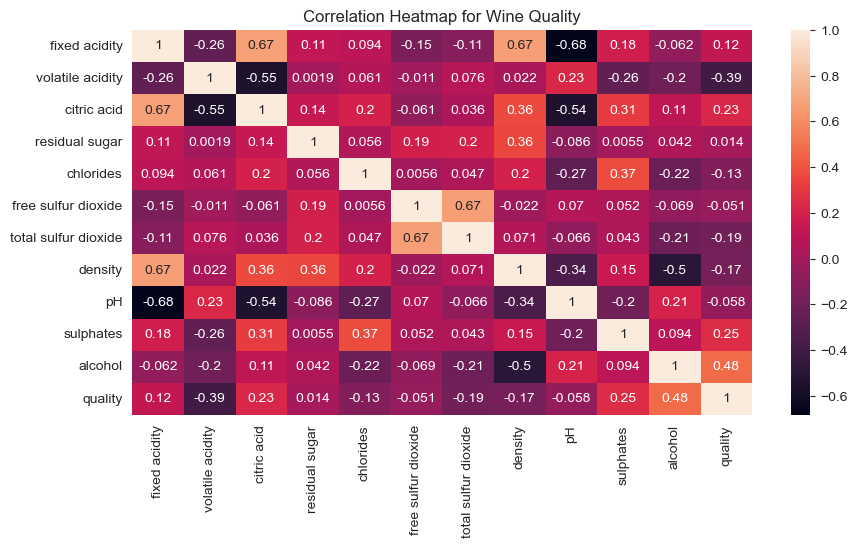

In [248]:
correlation = df.corr()

plt.figure(figsize=(10, 5))
sea.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap for Wine Quality')
plt.show()
# cmap='coolwarm',

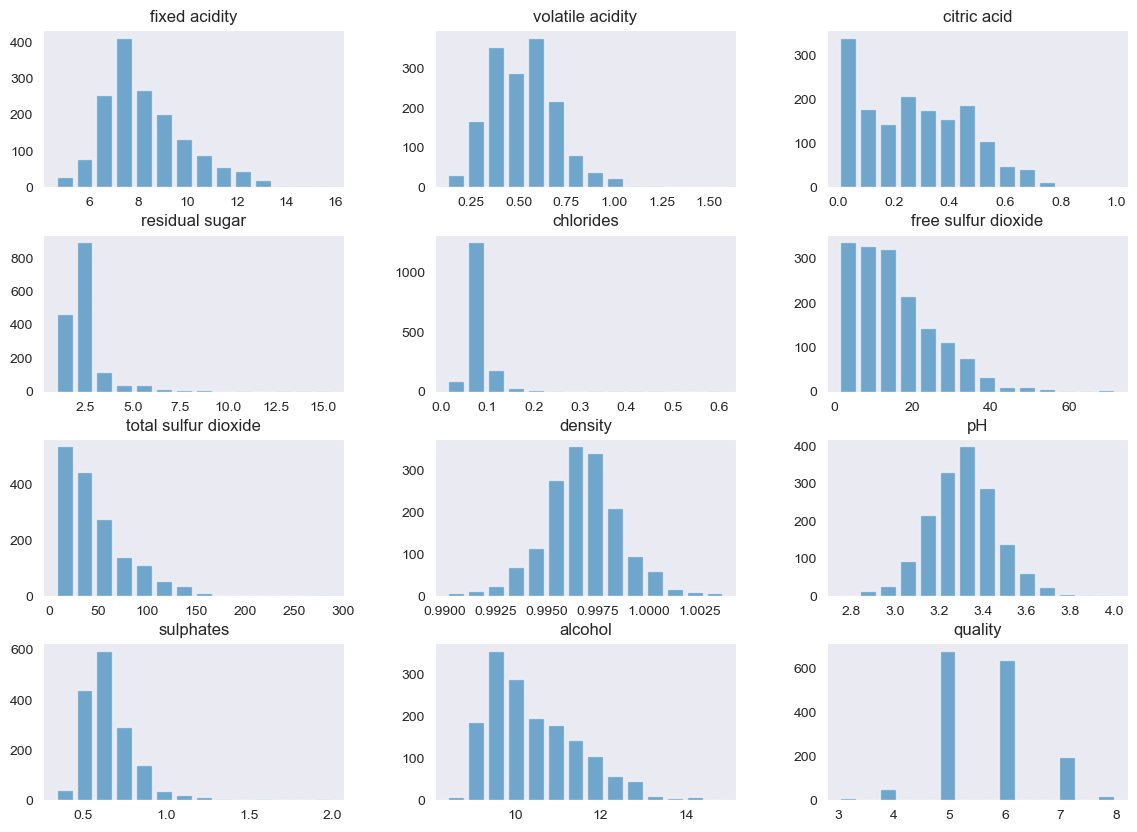

In [249]:
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].hist(bins=14,figsize=(14,10),alpha=0.6,grid=False,rwidth=0.8)
plt.show()

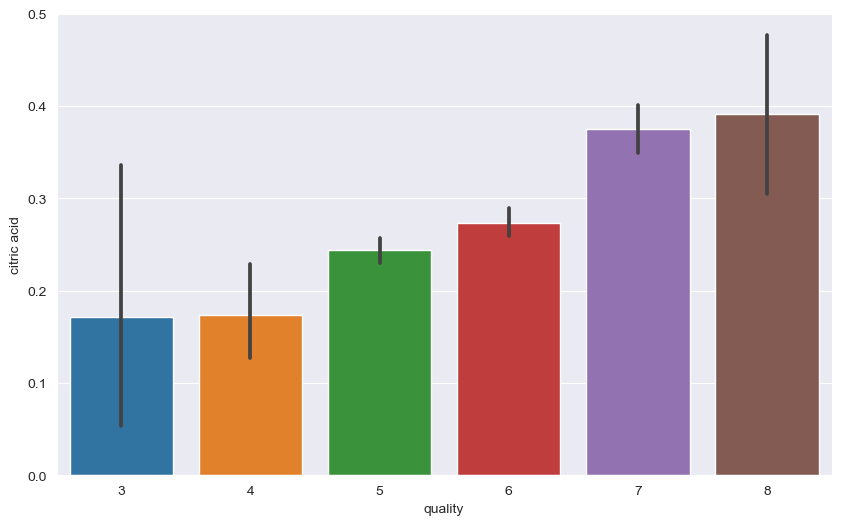

In [250]:
ploott=plt.figure(figsize=(10,6))
sea.barplot(x="quality",y="citric acid",data=df)
plt.show()

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [251]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [252]:
X=df.drop('quality',axis=1)
y=df['quality']

In [253]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
print("The model is split as is mentioned below: ")

for dataset in [y_train,y_test]:
    print(round(len(dataset)/len(X),2))

The model is split as is mentioned below: 
0.8
0.2


#### The first regression technique I have used is Random Forest

In [255]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [256]:
xtrain_pred_rf=rf_model.predict(X_train)
print("The trained values:",xtrain_pred_rf[150:160])

The trained values: [6.26 4.58 5.12 5.94 5.06 6.7  7.75 6.   6.86 4.49]


In [257]:
xtest_pred_rf=rf_model.predict(X_test)
print("The trained values:",xtest_pred_rf[150:160])

The trained values: [5.83 6.21 5.4  5.23 5.81 5.52 5.58 6.41 5.27 5.95]


#### The second regression technique I have used is Linear Regression

In [258]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [259]:
xtrain_pred_lr=lr_model.predict(X_train)
print("The trained values:",xtrain_pred_lr[150:160])

The trained values: [6.37827677 5.62159239 5.86538763 6.01443171 5.32454518 5.62041858
 6.12228513 5.72518476 6.13959677 5.47353825]


In [260]:
xtest_pred_lr=lr_model.predict(X_test)
print("The tested values:",xtest_pred_lr[150:160])

The tested values: [5.70161041 6.14167652 5.11821365 5.67658854 5.79362039 6.0891404
 5.22103588 5.90134727 5.48941228 5.93412645]


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**MAE (Mean absolute error)**

In [261]:
xtrain_mae_rf=(mean_absolute_error(xtrain_pred_rf,y_train))**0.5
print(xtrain_mae_rf)

0.39355638754799543


In [262]:
xtest_mae_rf=(mean_absolute_error(xtest_pred_rf,y_test))**0.5
print(xtest_mae_rf)

0.6515846069391142


In [263]:
xtest_mae_lr=(mean_absolute_error(xtest_pred_lr,y_test))**0.5
print(xtest_mae_lr)

0.7095987891424544


In [264]:
xtrain_mae_lr=(mean_absolute_error(xtrain_pred_lr,y_train))**0.5
print(xtrain_mae_lr)

0.7068377756943804


**RMSE (Root Mean Squared Error)** 

In [265]:
xtrain_rmse_rf=(mean_squared_error(xtrain_pred_rf,y_train))**0.5
print(xtrain_rmse_rf)

0.22092031543100082


In [266]:
xtest_rmse_rf=(mean_squared_error(xtest_pred_rf,y_test))**0.5
print(xtest_rmse_rf)

0.5547651530152196


In [267]:
xtrain_rmse_lr=(mean_squared_error(xtrain_pred_lr,y_train))**0.5
print(xtrain_rmse_lr)

0.6512995910592836


In [268]:
xtest_rmse_lr=(mean_squared_error(xtest_pred_lr,y_test))**0.5
print(xtest_rmse_lr)

0.6245199307980123


**R2 Score**

In [269]:
print("The R2 Score of Random Forest Regressor is: ",r2_score(y_test,xtest_pred_rf))

The R2 Score of Random Forest Regressor is:  0.5290564413694168


In [270]:
print("The R2 Score of Linear Regression is:",r2_score(y_test,xtest_pred_lr))

The R2 Score of Linear Regression is: 0.4031803412796233


# Feature Importance

In [271]:
feat_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [272]:
importance_rf=(rf_model.feature_importances_)
importance_rf=np.abs(importance_rf)
print(importance_rf)


[0.05030988 0.10676766 0.04890694 0.05626227 0.06677988 0.04559115
 0.08070332 0.05400916 0.06217547 0.15585226 0.27264202]


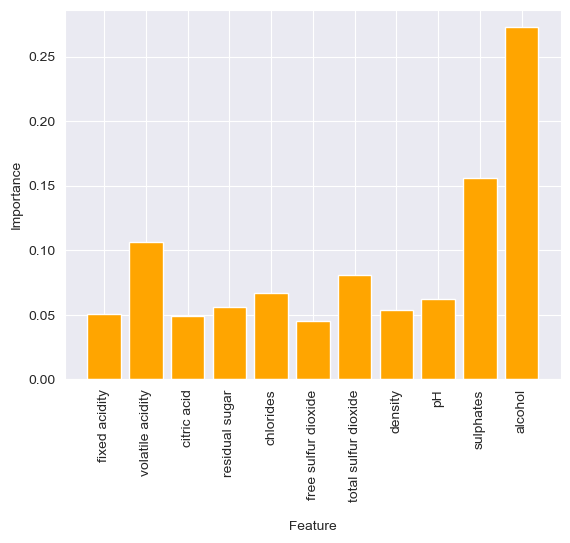

Feature 0: Importance = 0.05030987974403686
Feature 1: Importance = 0.10676765901413628
Feature 2: Importance = 0.04890693867647191
Feature 3: Importance = 0.05626226536843208
Feature 4: Importance = 0.06677987981171261
Feature 5: Importance = 0.04559114742280107
Feature 6: Importance = 0.08070331778576557
Feature 7: Importance = 0.054009161205067754
Feature 8: Importance = 0.06217546861231074
Feature 9: Importance = 0.15585225985175963
Feature 10: Importance = 0.2726420225075055


In [273]:
plt.bar(range(len(importance_rf)),importance_rf,color='orange')
plt.xticks(range(len(importance_rf)),feat_names,rotation='vertical')
plt.xlabel('\n Feature ')
plt.ylabel('Importance')
plt.show()
for feature_name, importance_value in zip(range(len(importance_rf)), importance_rf):
    print(f"Feature {feature_name}: Importance = {importance_value}")

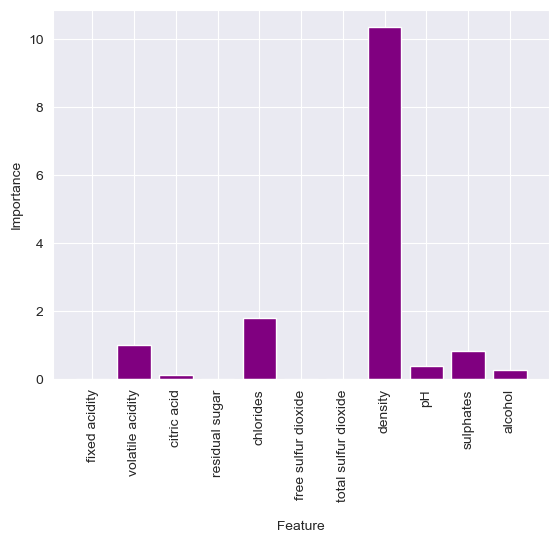

Feature 0: Importance = 0.023085333909275862
Feature 1: Importance = 1.0013044340678179
Feature 2: Importance = 0.14082146122412154
Feature 3: Importance = 0.006564311041477297
Feature 4: Importance = 1.8065031490473693
Feature 5: Importance = 0.005627334387083016
Feature 6: Importance = 0.003644448933868838
Feature 7: Importance = 10.351593588830205
Feature 8: Importance = 0.39368773233986815
Feature 9: Importance = 0.841171622609319
Feature 10: Importance = 0.28188956740919113


In [274]:
importance_lr = np.abs(lr_model.coef_)
plt.bar(range(len(importance_lr)),importance_lr,color='purple')
plt.xticks(range(len(importance_lr)),feat_names,rotation='vertical')
plt.xlabel('\n Feature ')
plt.ylabel('Importance')
plt.show()
for feature_name, importance_value in zip(range(len(importance_lr)), importance_lr):
    print(f"Feature {feature_name}: Importance = {importance_value}")

**After calculating the feature importance scores,it was found that the feature alcohol topped the list while using Random Forest Regressor and density seems to also be an important feature as indicated from visualisation of important features while using Linear Regression Algorithm **

### Conclusion

*TODO*

Features such as alcohol and density seems to be the best indicators of a good quality wine according to this project. Features such as sulphates, total sulphur dioxide and volatile acidity also contribute to the quality of the wine.

With respect to which was the better performing model, according to the results, Random Forest was better compared to Linear Regression. This was very evident because the values of rmse and mae of Linear Regression was higher and the R2 value was low. Whereas in Random Forest Regressor performed better as the rmse, mae values were lower and the r2 value was slightly higher compared to Linear Regressor. Would I deem Random Forest Regressor to be the best,when compared to Linear Regression, I would say yes... But if spoken about in a more general sense, Random Forest Regressor may be not the best as its  R2 value was only 0.5 and not very close to 1.